In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('winequalityN.csv')

In [3]:
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [5]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
feature_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]

In [7]:
df[feature_with_na].head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,pH,sulphates
0,7.0,0.27,0.36,20.7,0.045,3.00,0.45
1,6.3,0.30,0.34,1.6,0.049,3.30,0.49
2,8.1,0.28,0.40,6.9,0.050,3.26,0.44
3,7.2,0.23,0.32,8.5,0.058,3.19,0.40
4,7.2,0.23,0.32,8.5,0.058,3.19,0.40
5,8.1,0.28,0.40,6.9,0.050,3.26,0.44
6,6.2,0.32,0.16,7.0,0.045,3.18,0.47
7,7.0,0.27,0.36,20.7,0.045,3.00,0.45
8,6.3,0.30,0.34,1.6,0.049,3.30,0.49
9,8.1,0.22,0.43,1.5,0.044,3.22,0.45


In [8]:
for feature in feature_with_na:
    df[feature].fillna(df[feature].mean(), inplace=True)
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

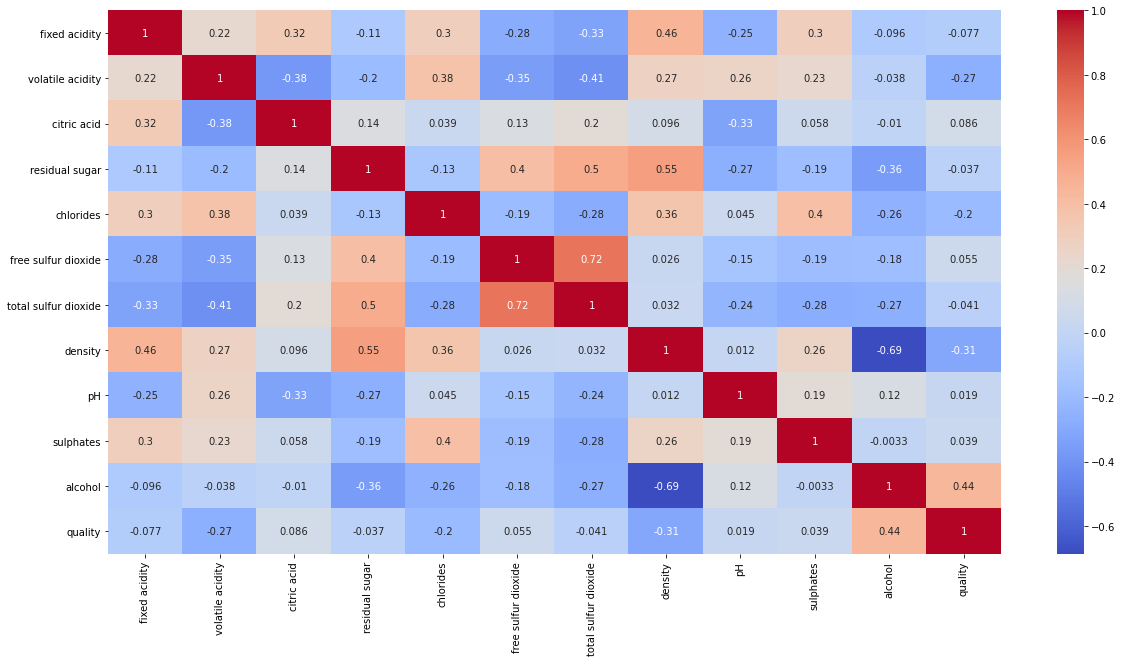

In [9]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap='coolwarm')

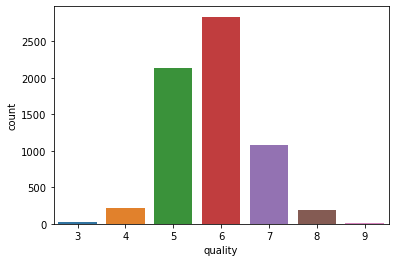

In [10]:
sns.countplot(df['quality'])

In [11]:
X=df.drop(columns=['type','quality'])
y=df['quality']

In [12]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [13]:
y.head(5)

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [14]:
percent=(y.value_counts())/64.97

In [15]:
print(percent)

6    43.650916
5    32.907496
7    16.607665
4     3.324611
8     2.970602
3     0.461752
9     0.076959
Name: quality, dtype: float64


In [17]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors=4)
#transform the dataset
X,y=oversample.fit_resample(X,y)

In [18]:
y.value_counts()

9    2836
8    2836
7    2836
6    2836
5    2836
4    2836
3    2836
Name: quality, dtype: int64

In [20]:
X.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,19852.0,7.286570,1.188846,3.80000,6.600000,7.091802,7.767630,15.90000
volatile acidity,19852.0,0.366339,0.195975,0.08000,0.250000,0.307238,0.410000,1.58000
citric acid,19852.0,0.318014,0.132145,0.00000,0.260000,0.320000,0.392977,1.66000
residual sugar,19852.0,5.024822,4.130326,0.60000,1.945302,3.275471,7.201337,65.80000
chlorides,19852.0,0.052951,0.035402,0.00900,0.033322,0.043741,0.060000,0.61100
free sulfur dioxide,19852.0,30.514535,22.756161,1.00000,15.647532,28.000000,39.308860,289.00000
total sulfur dioxide,19852.0,114.099868,59.051874,6.00000,81.000000,116.000000,148.000000,440.00000
density,19852.0,0.994045,0.003003,0.98711,0.991382,0.994004,0.996493,1.03898
pH,19852.0,3.239752,0.151554,2.72000,3.137223,3.241032,3.340000,4.01000
sulphates,19852.0,0.513608,0.129782,0.22000,0.429070,0.490770,0.575353,2.00000


In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10, random_state=42)

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
#classify function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model,X,y):
    
    #train the model
    model.fit(X_train,y_train)
    print("Accuracy", model.score(X_test,y_test)*100)
    score=cross_val_score(model,X,y,cv=3)
    print("CV Score", np.mean(score)*100)

In [87]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
classify(model,X,y)

Accuracy 49.89929506545821
CV Score 30.294215629619874


In [88]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=22,min_samples_split=2)
classify(model,X,y)

Accuracy 82.88016112789526
CV Score 73.70043192287224


In [89]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=120)
classify(model,X,y)

Accuracy 90.33232628398792
CV Score 81.3923285746871


In [90]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,max_depth=23)
classify(model,X,y)

Accuracy 90.08056394763344
CV Score 81.30165380315445


In [91]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model,X,y)

Accuracy 90.88620342396777
CV Score 82.3896840771697


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classify(classifier,X,y)

Accuracy 52.769385699899296


In [73]:
y_pred = classifier.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [75]:
accuracy

0.527693856998993

In [77]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)


KeyboardInterrupt: 